<a href="https://colab.research.google.com/github/IshtiaqAli-GSU/snowflake-morphology-classifier/blob/main/notebooks/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.19.0
Num GPUs Available: 1


In [8]:
# Create folder
!mkdir -p /content/drive/MyDrive/snowflake-morphology-classifier/data/raw
%cd /content/drive/MyDrive/snowflake-morphology-classifier/data/raw

# Download only the image Zarr and one metadata parquet file
!wget https://zenodo.org/record/8083133/files/MASCdb.zarr.zip
!wget https://zenodo.org/record/8083133/files/MASCdb_triplet.parquet

/content/drive/MyDrive/snowflake-morphology-classifier/data/raw
--2025-10-30 20:40:51--  https://zenodo.org/record/8083133/files/MASCdb.zarr.zip
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.43.153, 188.185.48.75, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/8083133/files/MASCdb.zarr.zip [following]
--2025-10-30 20:40:51--  https://zenodo.org/records/8083133/files/MASCdb.zarr.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 5779447281 (5.4G) [application/octet-stream]
Saving to: ‘MASCdb.zarr.zip’

MASCdb.zarr.zip     100%[===================>]   5.38G  9.41MB/s    in 9m 57s  

2025-10-30 20:50:48 (9.24 MB/s) - ‘MASCdb.zarr.zip’ saved [5779447281/5779447281]

--2025-10-30 20:50:49--  https://zenodo.org/record/8083133/files/MASCdb_triplet.parquet
Resolving zenodo.org (zenodo.org)... 188.185.48.75, 188.185.4

In [9]:
!unzip MASCdb.zarr.zip -d MASCdb.zarr

Archive:  MASCdb.zarr.zip
   creating: MASCdb.zarr/MASCdb.zarr/
  inflating: MASCdb.zarr/MASCdb.zarr/.zgroup  
  inflating: MASCdb.zarr/MASCdb.zarr/.zattrs  
   creating: MASCdb.zarr/MASCdb.zarr/data/
  inflating: MASCdb.zarr/MASCdb.zarr/data/2262.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/1702.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/3658.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/931.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/3570.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/1783.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/169.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/2398.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/2208.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/3244.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/2022.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/89.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/103.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zarr/data/331.0.0.0  
  inflating: MASCdb.zarr/MASCdb.zar

In [10]:
!rm MASCdb.zarr.zip

In [11]:
!mv /content/drive/MyDrive/snowflake-morphology-classifier/data/raw/MASCdb.zarr/MASCdb.zarr/* \
   /content/drive/MyDrive/snowflake-morphology-classifier/data/raw/MASCdb.zarr/
!rm -rf /content/drive/MyDrive/snowflake-morphology-classifier/data/raw/MASCdb.zarr/MASCdb.zarr



In [12]:
!mv /content/drive/MyDrive/snowflake-morphology-classifier/data/raw/MASCdb_triplet.parquet \
    /content/drive/MyDrive/snowflake-morphology-classifier/data/metadata/


In [20]:
import pandas as pd

meta_path = "/content/drive/MyDrive/snowflake-morphology-classifier/data/metadata/MASCdb_triplet.parquet"
meta = pd.read_parquet(meta_path)

# Display 10 random samples with only flake_id and snowflake_class_name columns
sample = meta[["flake_id", "snowflake_class_name"]].sample(10, random_state=42)
print(sample)


                                flake_id snowflake_class_name
421709  2017.04.17_06.40.08_flake_316925              graupel
14427      2015.03.04_07.43.20_flake_927            aggregate
805870   2020.02.26_14.36.14_flake_33943              graupel
542466  2017.07.04_14.50.42_flake_686292       small_particle
72665    2015.12.17_01.22.06_flake_18444            aggregate
271658    2017.01.27_16.41.17_flake_7593            aggregate
729909   2018.03.07_23.17.56_flake_11636            aggregate
772573   2019.03.15_12.47.51_flake_21854              graupel
628209   2017.01.13_23.19.55_flake_29088              graupel
500805  2017.06.25_00.25.51_flake_551333              graupel


In [22]:
import pandas as pd

meta_path = "/content/drive/MyDrive/snowflake-morphology-classifier/data/metadata/MASCdb_triplet.parquet"
meta = pd.read_parquet(meta_path)

# list unique snowflake classes
print(meta["snowflake_class_name"].unique())

# keep only the four main types
keep = ["graupel", "aggregate", "planar_crystal", "columnar_crystal"]
filtered = meta[meta["snowflake_class_name"].isin(keep)]

print("\nClass distribution in filtered set:")
print(filtered["snowflake_class_name"].value_counts())

# save filtered version
filtered.to_csv("/content/drive/MyDrive/snowflake-morphology-classifier/data/metadata/filtered_labels.csv", index=False)
print("\n✅ Saved filtered_labels.csv successfully!")


['graupel' 'small_particle' 'aggregate' 'planar_crystal'
 'columnar_crystal' 'columnar_planar_combination']

Class distribution in filtered set:
snowflake_class_name
graupel             366240
aggregate           210370
columnar_crystal     39253
planar_crystal       21673
Name: count, dtype: int64

✅ Saved filtered_labels.csv successfully!


In [24]:
!pip install zarr
!pip install matplotlib

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/mascdb-0.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 8.7 MB/s eta 0:00:00
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/mascdb-0.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


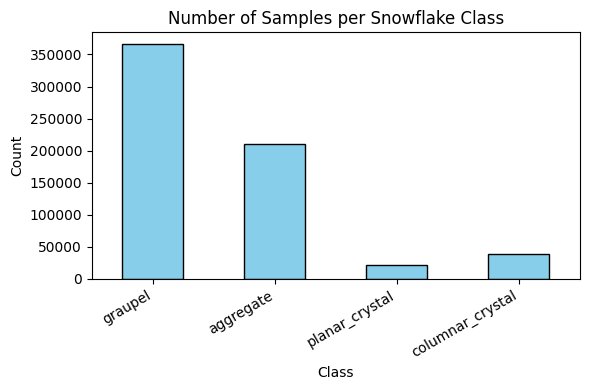

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load filtered metadata
meta_path = "/content/drive/MyDrive/snowflake-morphology-classifier/data/metadata/filtered_labels.csv"
df = pd.read_csv(meta_path)

# Count how many samples per class
counts = df["snowflake_class_name"].value_counts().reindex(
    ["graupel", "aggregate", "planar_crystal", "columnar_crystal"]
)

# Plot
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Samples per Snowflake Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
